In [1]:
%matplotlib inline

Import the BigBang modules as needed. These should be in your Python environment if you've installed BigBang correctly.

In [2]:
import bigbang.mailman as mailman
import bigbang.graph as graph
import bigbang.process as process
from bigbang.parse import get_date
#from bigbang.functions import *
from bigbang.archive import Archive

Also, let's import a number of other dependencies we'll use later.

In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import math
import pytz
import pickle
import os

pd.options.display.mpl_style = 'default' # pandas has a set of preferred graph formatting options

Now let's load the data for analysis. Load the Archive, the get the count of number of emails sent per day (the 'activity').

In [4]:
arx = Archive("https://lists.wikimedia.org/pipermail/wikimedia-l/",archive_dir="../archives")

acts = arx.get_activity()

../archives/wikimedia-l.csv


/home/sb/projects/bigbang/bigbang/archive.py:92: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index,col_indexer] = value instead
  mdf2['Date'] = mdf['Date'].apply(lambda x: x.toordinal())


How can we plot the number of participants over time?

This depends on what we mean. Suppose by 'participant' we mean people who are actively emailing the list. This is something we can derive from the activity data. We just have to make sure to count only unique email senders rather than total number of emails sent.

In [5]:
participants = (acts > 0).sum(1)

This variable is for the range of days used in computing rolling averages.

In [14]:
window = 20

For each of the mailing lists we are looking at, plot the rolling average of number of emails sent per day.

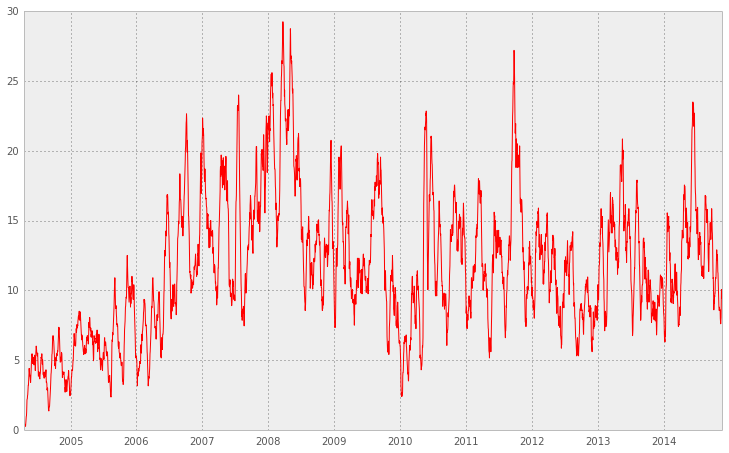

In [15]:
plt.figure(figsize=(12.5, 7.5))

rmpa = pd.rolling_mean(participants,window)
rmpadna = rmpa.dropna()
plt.plot_date(rmpadna.index,
              rmpadna.values,
              'r',
              xdate=True)

plt.show()

But maybe when we talk about 'participants' we would like to include those who are reading the list even though they are not writing to it. It would be nice if we could take this kind of participation into account. 